# Dopamine Model of TD Leraning

you want to model the response of dopamine neurons in the interval between a stimulus (state 0) and reward delivery (state 10). Each state represents a unit of time that passes between the stimulus and reward. Use the `td_learning.m` starter code to simulate a TD learning agent.
1. Make a plot of value vs. states for the first trial. What do you notice?
2. Now make a plot of the dopamine response (RPE) vs. states (also for the first trial). What do you notice?

In [1]:
import numpy as np

def td_learning(alpha=0.1, gamma=0.9, num_trials=100, num_states=10):
    # The last state is the reward state, python starts at 0
    reward_state = num_states - 1

    # Initialize value function
    V = np.zeros(num_states)

    # Initialize arrays to store dopamine signals and state values
    rpe = np.zeros((num_trials, num_states))
    state_values = np.zeros((num_trials, num_states))

    # Simulate TD learning
    for trial in range(num_trials):
        for state in range(num_states - 1):
            next_state = state + 1
            reward = (next_state == reward_state)
            delta = reward + gamma * V[next_state] - V[state]
            V[state] = V[state] + alpha * delta

            # Store the dopamine signal (reward prediction error)
            rpe[trial, state] = delta

            # Store state values
            state_values[trial, state] = V[state]

    return rpe, state_values

## First Trial Value & RPE v.s. States

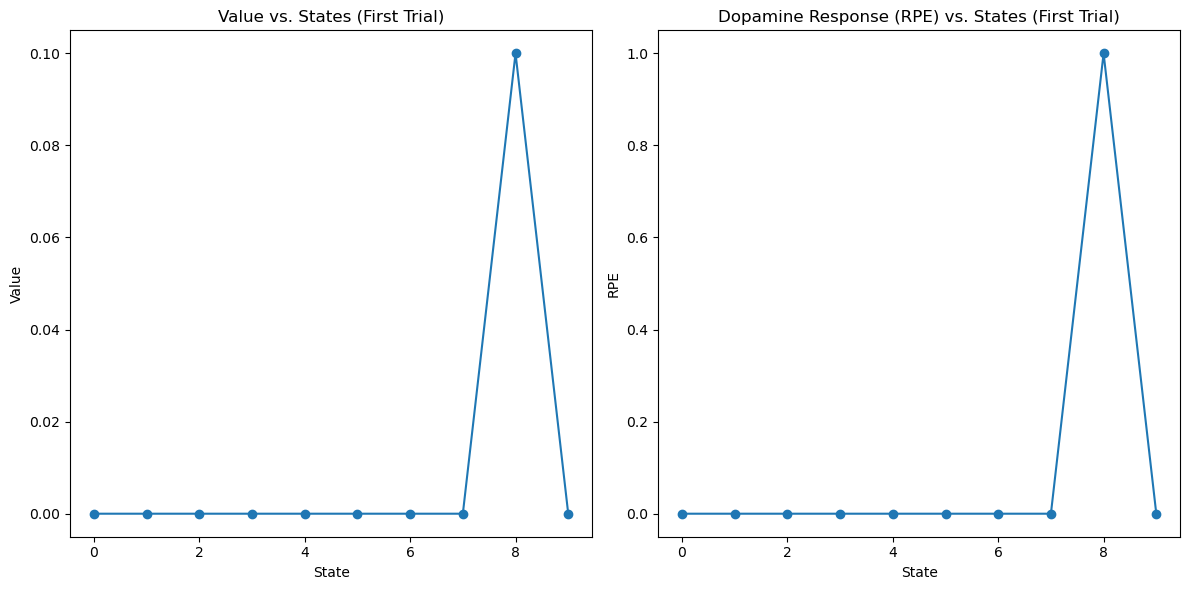

In [2]:
import matplotlib.pyplot as plt

# Run TD learning
rpe, state_values = td_learning()

# Plot value vs. states for the first trial
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(state_values[0, :], marker='o')
plt.title('Value vs. States (First Trial)')
plt.xlabel('State')
plt.ylabel('Value')

# Plot dopamine response (RPE) vs. states for the first trial
plt.subplot(1, 2, 2)
plt.plot(rpe[0, :], marker='o')
plt.title('Dopamine Response (RPE) vs. States (First Trial)')
plt.xlabel('State')
plt.ylabel('RPE')

plt.tight_layout()
plt.show()

The value of a given state and the dopamine error response both peak at state 8, which is the state leading into the reward state, indicating a big error in prediction due to the unexpected reward stage. As for the value graph, **the agents learns the value of state leading to the reward state as a high value state since the TD update equation of a current state is updated with the next state’s value.**

## Last Trial Value & RPE v.s. States

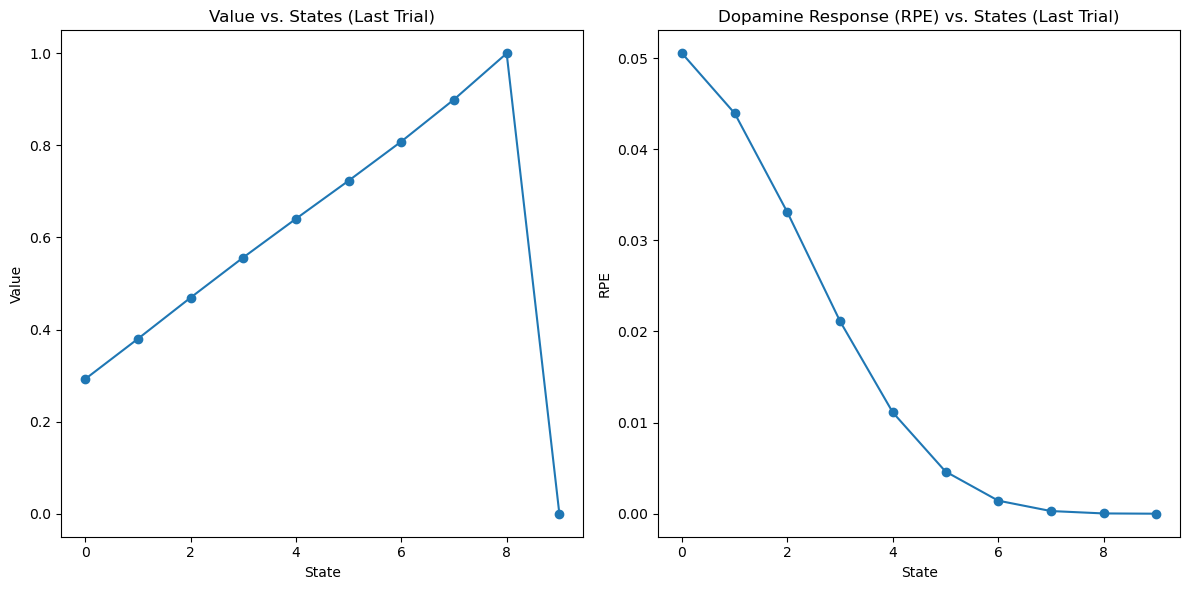

In [3]:
# Plot value vs. states for the first trial
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(state_values[99, :], marker='o')
plt.title('Value vs. States (Last Trial)')
plt.xlabel('State')
plt.ylabel('Value')

# Plot dopamine response (RPE) vs. states for the first trial
plt.subplot(1, 2, 2)
plt.plot(rpe[99, :], marker='o')
plt.title('Dopamine Response (RPE) vs. States (Last Trial)')
plt.xlabel('State')
plt.ylabel('RPE')

plt.tight_layout()
plt.show()

This represents a more stable understanding of the environment where the value forms a linear rise with the increases in state and has a sharp drop exactly at the reward state (because the next state is zero value). On the other hand, the dopamine prediction error is a much smoother curve where there is a higher positive prediction error in the starts of the state and then lowers the errors in the later states.

1. This might be caused by the fact that it is closer to make more correct predictions as it is closer to the reward state and it gets harder to understand the values when the states gets more distance from the actual rewarding state, the “signal” is a lot less strong and it becomes harder to predict the actual correct value of the state (temporal nature).

2. Moreover, because later states’ value is essentially carried away by the reward directly, it is easier to estimate the values. However, it becomes harder in the beginning because the estimates would depend on the prediction value of the future state, which is not as stable of a signal to use as the reward itself.


## Heat Map of Varying Learning Rate

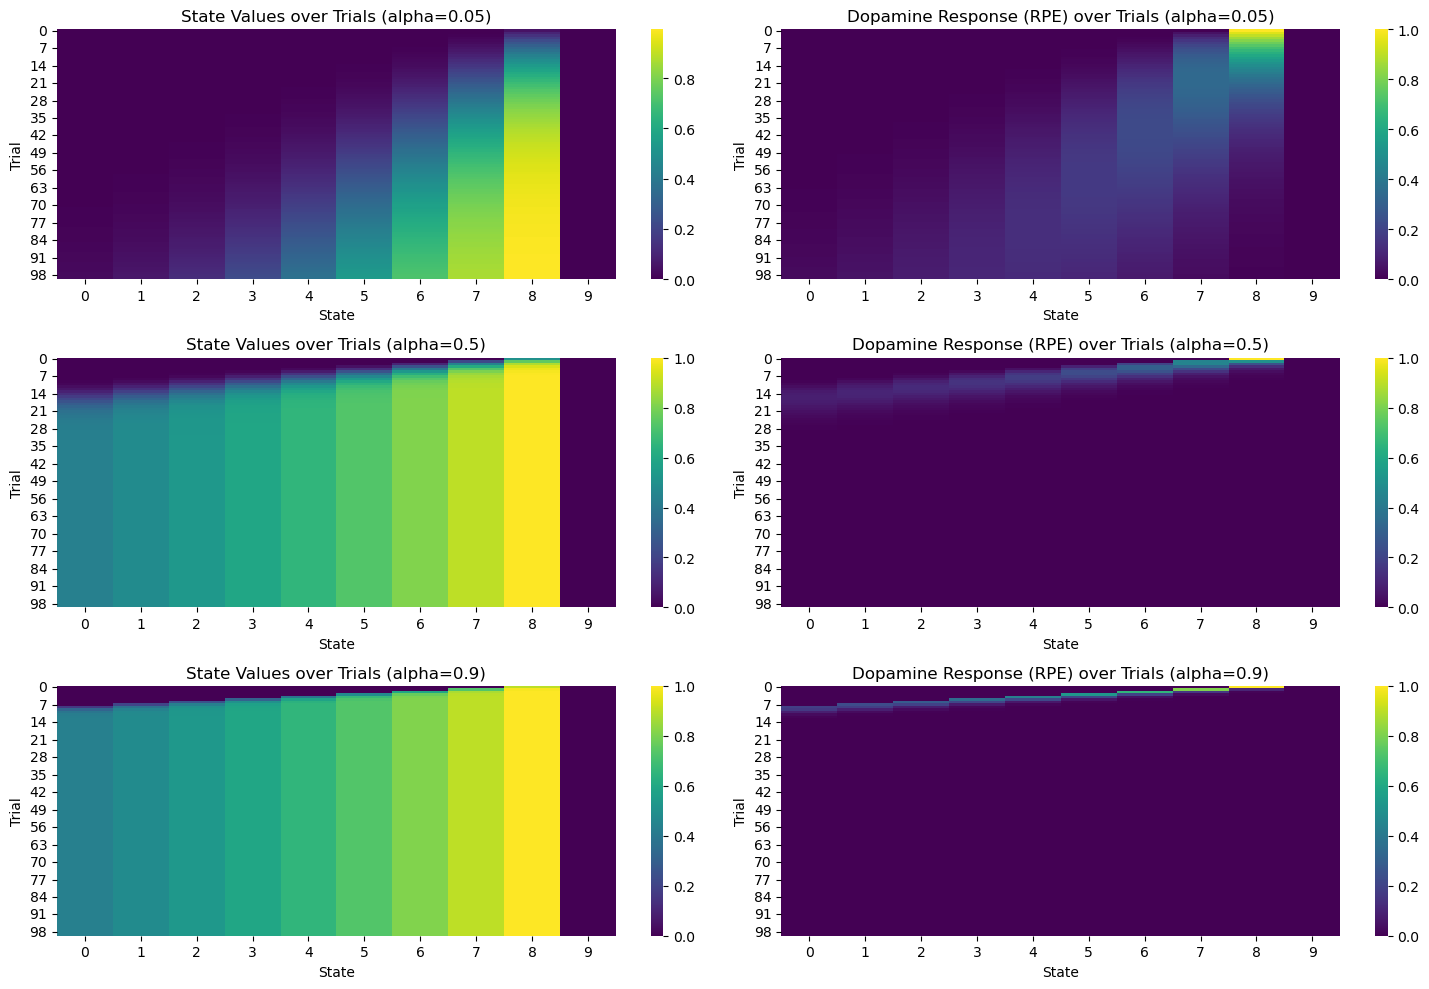

In [4]:
import seaborn as sns

alpha_values = [0.05, 0.5, 0.9]
num_trials = 100
num_states = 10

fig, axes = plt.subplots(3, 2, figsize=(15, 10))

for i, alpha in enumerate(alpha_values):
    rpe, state_values = td_learning(alpha=alpha, num_trials=num_trials, num_states=num_states)

    # Plot heatmap of state values over trials
    sns.heatmap(state_values, ax=axes[i, 0], cmap="viridis")
    axes[i, 0].set_title(f'State Values over Trials (alpha={alpha})')
    axes[i, 0].set_xlabel('State')
    axes[i, 0].set_ylabel('Trial')

    # Plot heatmap of RPE over trials
    sns.heatmap(rpe, ax=axes[i, 1], cmap="viridis")
    axes[i, 1].set_title(f'Dopamine Response (RPE) over Trials (alpha={alpha})')
    axes[i, 1].set_xlabel('State')
    axes[i, 1].set_ylabel('Trial')

plt.tight_layout()
plt.show()

Since the environment in this condition is not super complex, as the learning rate increases, the agent is able to achieve a good understanding of the environment faster. Same is reflected on the heat map:

1. As getting closer to the reward state, the reward signal becomes stronger (more yellow), this is the same with previous line plots.

2. As the learning rate increases, the agent is able to build a robust understanding of the environment faster (0.05 agent is having a hard time understanding earlier states even at later trials while the 0.9 agent is able to grasp the understanding earlier in trials).

3. Earlier states (further from reward states) are also harder to learn the values of as demonstrated in the previous question.
The highest error prediction is around the time of the reward in earlier trials, just as demonstrated previously. Gradually the prediction error, even for the low learning rate ones, drops to zero around the reward.

4. The increase in learning rate makes the drop of the prediction error around the reward state really quickly.

## Heat Map of Varying Discount Rate

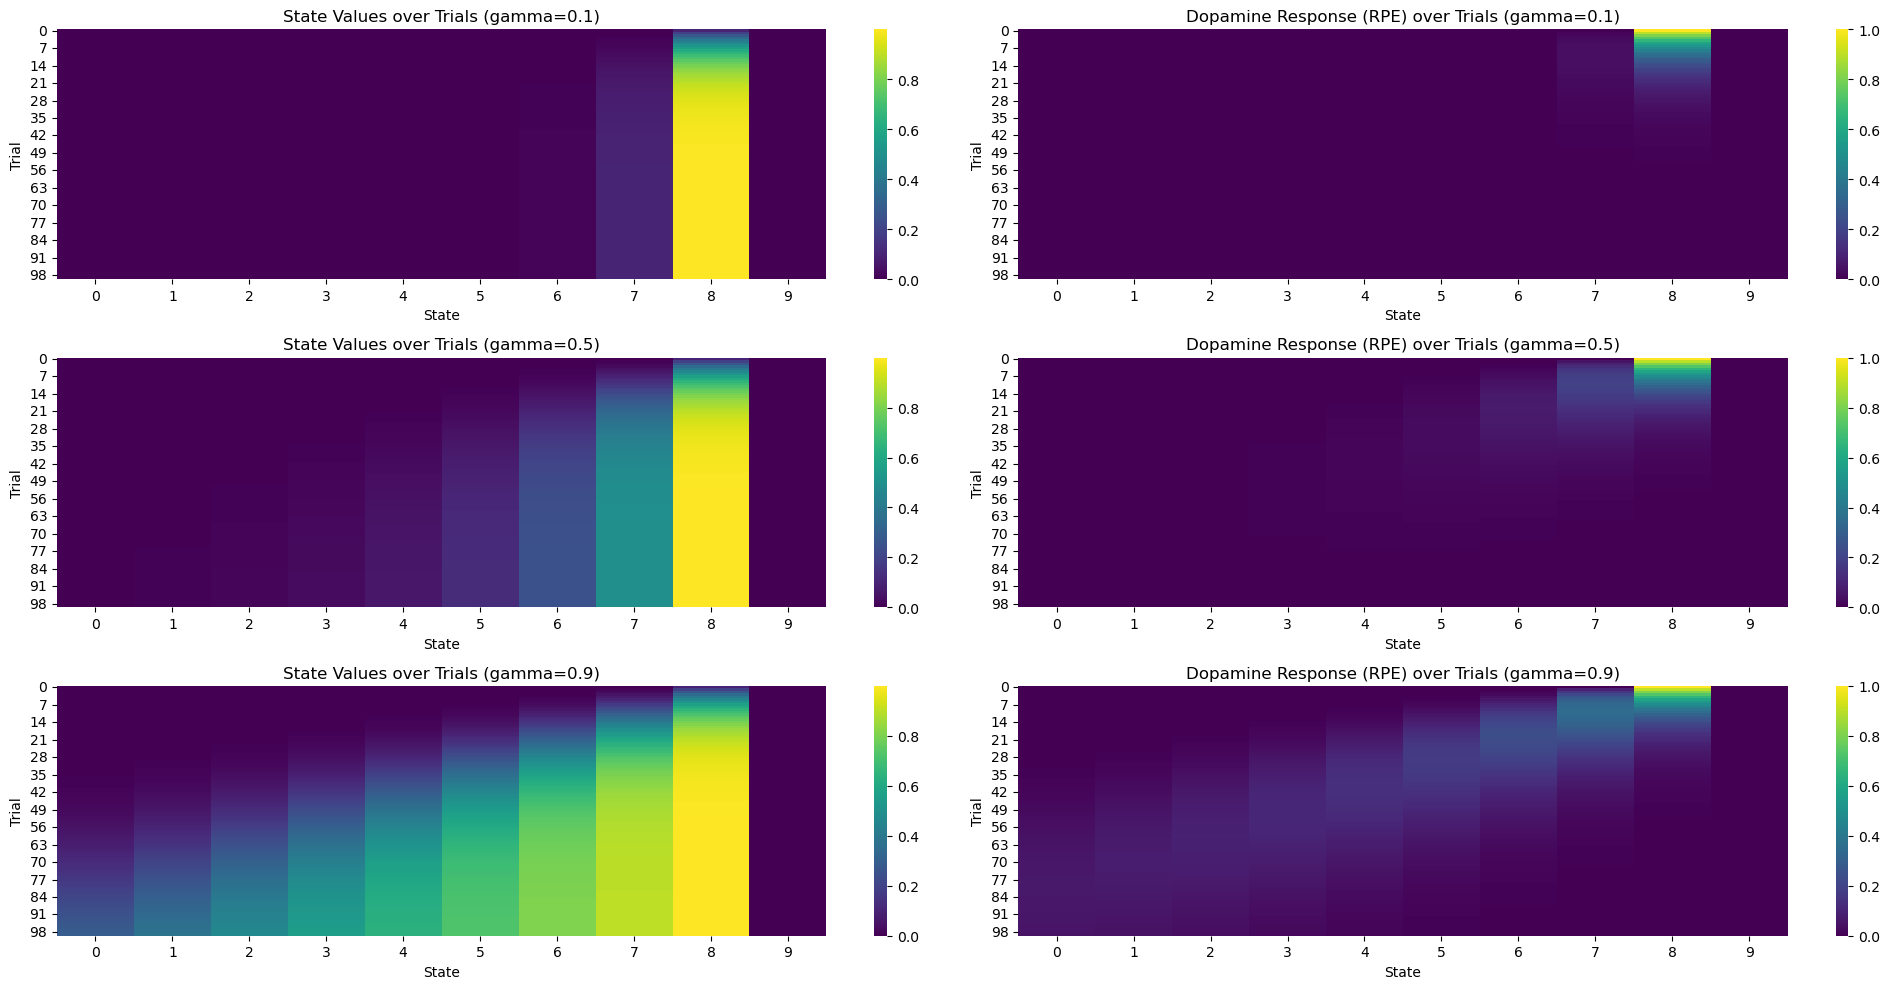

In [5]:
gamma_values = [0.1, 0.5, 0.9]
num_trials = 100
num_states = 10

fig, axes = plt.subplots(3, 2, figsize=(20, 10))

for i, gamma in enumerate(gamma_values):
    rpe, state_values = td_learning(alpha=0.1, gamma=gamma, num_trials=num_trials, num_states=num_states)

    # Plot heatmap of state values over trials
    sns.heatmap(state_values, ax=axes[i, 0], cmap="viridis", cbar=True)
    axes[i, 0].set_title(f'State Values over Trials (gamma={gamma})')
    axes[i, 0].set_xlabel('State')
    axes[i, 0].set_ylabel('Trial')

    # Plot heatmap of RPE over trials
    sns.heatmap(rpe, ax=axes[i, 1], cmap="viridis", cbar=True)
    axes[i, 1].set_title(f'Dopamine Response (RPE) over Trials (gamma={gamma})')
    axes[i, 1].set_xlabel('State')
    axes[i, 1].set_ylabel('Trial')

plt.tight_layout()
plt.show()

The higher the discount rate, the more valuable the later state would impact the previous state's value. As can be seen from the state value over trials heat map, higher gamma value would lead to faster and sharper updates in the state values as there is a strong consideration for the future reward, so the whole sequences of states would be sequentially more activated getting closer to the reward. Under the same logic, RPE would initially be higher for the states leading up to the reward state because there is a surprising stronger correlation between the earlier states and the later reward.

On the other hand, a low discount rate would mean that future reward doesn’t matter as much for earlier states and it is reflected by the state value graph where earlier states would not be activated on heat map at all as it is not considering later reward at all (initialized value at 0). Only the very near state next to the state prior to the reward state (state 7) would have value activation. Similarly, the RPE graph would only have unexpected surprising value errors only on the state prior to the reward state as that is the only one that has a difference from expectation (originally all the state values start from 0, so there would be no change in the expected value of earlier stages, hence no RPE signals).

# Addiction Model of TD Learning

In [6]:
def td_learning(alpha=0.1, gamma=0.9, num_trials=100, num_states=10, dopamine_surge=0.0):
    # The last state is the reward state
    reward_state = num_states - 1

    # Initialize value function
    V = np.zeros(num_states)

    # Initialize arrays to store dopamine signals and state values
    rpe = np.zeros((num_trials, num_states))
    state_values = np.zeros((num_trials, num_states))

    # Simulate TD learning
    for trial in range(num_trials):
        for state in range(num_states - 1):
            next_state = state + 1
            reward = (next_state == reward_state)
            delta = max(reward + gamma * V[next_state] - V[state] + dopamine_surge * reward, dopamine_surge * reward)
            V[state] = V[state] + alpha * delta

            # Store the dopamine signal (reward prediction error)
            rpe[trial, state] = delta

            # Store state values
            state_values[trial, state] = V[state]

    return rpe, state_values

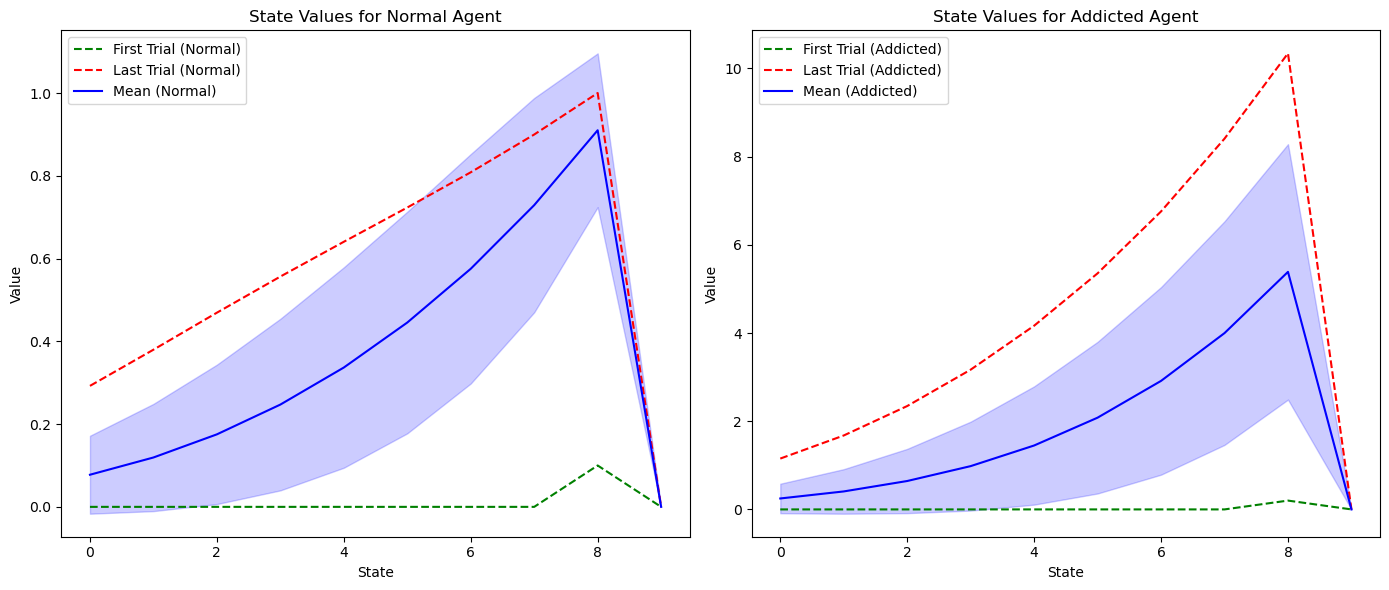

In [7]:
alpha = 0.1
gamma = 0.9
num_trials = 100
num_states = 10
drug_effect = 1

# Simulate both conditions
rpe_normal, state_values_normal = td_learning(alpha, gamma, num_trials, num_states)
rpe_addicted, state_values_addicted = td_learning(alpha, gamma, num_trials, num_states, drug_effect)

# Mean and standard deviation
mean_state_values_normal = np.mean(state_values_normal, axis=0)
mean_state_values_addicted = np.mean(state_values_addicted, axis=0)
std_state_values_normal = np.std(state_values_normal, axis=0)
std_state_values_addicted = np.std(state_values_addicted, axis=0)

# Plotting
plt.figure(figsize=(14, 6))

# State Values for Normal Agent
plt.subplot(1, 2, 1)
plt.plot(state_values_normal[0], 'g--', label='First Trial (Normal)')
plt.plot(state_values_normal[-1], 'r--', label='Last Trial (Normal)')
plt.plot(mean_state_values_normal, 'b', label='Mean (Normal)')
plt.fill_between(range(num_states), mean_state_values_normal - std_state_values_normal, 
                 mean_state_values_normal + std_state_values_normal, color='b', alpha=0.2)
plt.title('State Values for Normal Agent')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()

# State Values for Addicted Agent
plt.subplot(1, 2, 2)
plt.plot(state_values_addicted[0], 'g--', label='First Trial (Addicted)')
plt.plot(state_values_addicted[-1], 'r--', label='Last Trial (Addicted)')
plt.plot(mean_state_values_addicted, 'b', label='Mean (Addicted)')
plt.fill_between(range(num_states), mean_state_values_addicted - std_state_values_addicted, 
                 mean_state_values_addicted + std_state_values_addicted, color='b', alpha=0.2)
plt.title('State Values for Addicted Agent')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()

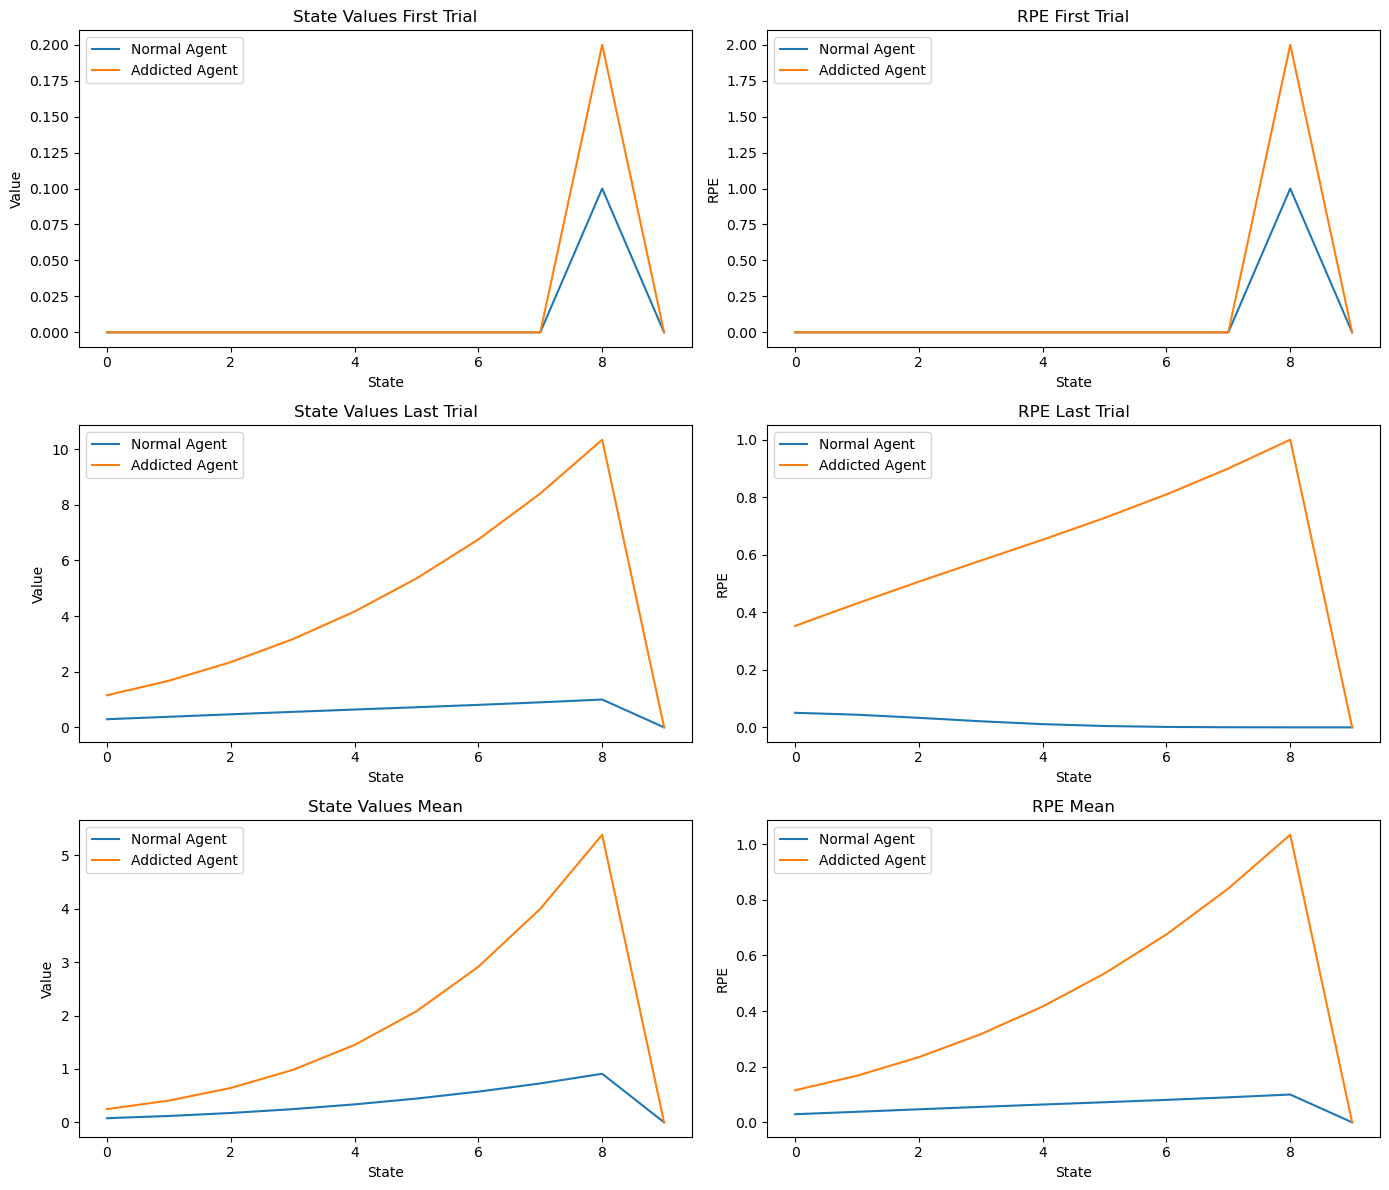

In [8]:
# Simulate both conditions
rpe_normal, state_values_normal = td_learning(alpha, gamma, num_trials, num_states)
rpe_addicted, state_values_addicted = td_learning(alpha, gamma, num_trials, num_states, drug_effect)

# Calculate mean state values and RPEs
mean_state_values_normal = np.mean(state_values_normal, axis=0)
mean_state_values_addicted = np.mean(state_values_addicted, axis=0)
mean_rpe_normal = np.mean(rpe_normal, axis=0)
mean_rpe_addicted = np.mean(rpe_addicted, axis=0)

# Plotting
plt.figure(figsize=(14, 12))

# Plot First and Last Trials
plt.subplot(3, 2, 1)
plt.plot(state_values_normal[0], label='Normal Agent')
plt.plot(state_values_addicted[0], label='Addicted Agent')
plt.title('State Values First Trial')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(state_values_normal[-1], label='Normal Agent')
plt.plot(state_values_addicted[-1], label='Addicted Agent')
plt.title('State Values Last Trial')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(mean_state_values_normal, label='Normal Agent')
plt.plot(mean_state_values_addicted, label='Addicted Agent')
plt.title('State Values Mean')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(rpe_normal[0], label='Normal Agent')
plt.plot(rpe_addicted[0], label='Addicted Agent')
plt.title('RPE First Trial')
plt.xlabel('State')
plt.ylabel('RPE')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(rpe_normal[-1], label='Normal Agent')
plt.plot(rpe_addicted[-1], label='Addicted Agent')
plt.title('RPE Last Trial')
plt.xlabel('State')
plt.ylabel('RPE')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(mean_rpe_normal, label='Normal Agent')
plt.plot(mean_rpe_addicted, label='Addicted Agent')
plt.title('RPE Mean')
plt.xlabel('State')
plt.ylabel('RPE')
plt.legend()

plt.tight_layout()
plt.show()

No matter for the first trial, last trial, or the mean trial value, the addicted model is always getting higher values, which is an effect caused by the drug state reward propagating backward to the earlier state (can be seen from the last trial and mean trail graph for state values, the tail indicate that the reward is been propagated back to the earlier state and the closer a state gets to the drug state, the higher the reward it would be.

- The same can be noticed from the first two graphs, when the normal agent maintains a linear relationship of values taking up to the reward, the addicted agent forms a skewed relationship between values and states leading up to the reward states and the values are a lot higher in comparison.

From the RPE graph, the addicted agent would maintain a continuously positive prediction error from the time of cue to the drug state because the the values of the values of any states would increase until infinity from the reward back propagation effect of the constantly increasing reward of drug state (always a plus to the expected values), neglecting the functional structure of the TD update and the termination of learning when reward is achieved.

- Learning goes on continuously until infinity in a wrong direction , anticipating more and more rewards, no stops when rewarded , never being satisfied from the reward.
